In [1]:
from uncertainties import *
from uncertainties import unumpy #need to import unumpy like this otherwise calling functions like unumpy.tan 
# will be difficult since they are called the same as in numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
from scipy.optimize import curve_fit

In [2]:
def distance(col_name,err):
    '''This function takes a given column and error and returns that as an earray filled with ufloats'''
    arr = np.array([ufloat(df[col_name][1] , err + + 0.05*df[col_name][1])])
    for i in range(2,len(df[col_name])+1):
        x = [ufloat(df[col_name][i] , err + + 0.05*df[col_name][1])]
        arr = np.append(arr,x)
    return arr
def linearFunc(x,intercept,slope):
    y = intercept + slope * x
    return y
def data_fitting_error(linearFunc, freq,  Kmax, d_Kmax, Data, x_label, y_label, titlee):
    '''freq= xdata
        Kmax=ydata
        d_Kmax=yerror
        Data=name of dataset'''
    a_fit,cov=curve_fit(linearFunc,freq,Kmax,sigma=d_Kmax)
    inter = a_fit[0]
    slope = a_fit[1]
    d_inter = sqrt(cov[0][0])
    d_slope = sqrt(cov[1][1])
    # Create a graph showing the data.
    errorbar(freq,Kmax,yerr=d_Kmax,fmt='r.',label=Data)

    # Compute a best fit line from the fit intercept and slope.
    Kmax_fit = inter + slope*freq

    # Create a graph of the fit to the data. We just use the ordinary plot
    # command for this.
    plot(freq,Kmax_fit,label='Fit')

    # Display a legend, label the x and y axes and title the graph.
    legend()
    xlabel(x_label)
    ylabel(y_label)
    title(titlee + ' ' + Data)

    # Save the figure to a file
    plt.savefig(Data+'.png')

    # Show the graph in a new window on the users screen.
    show()
    return slope, d_slope, inter, d_inter,freq,Kmax_fit
def dropna_single_column(df,x_name,col_name,err_name):
    '''
    df=dataframe
    x_name=column of value for x axis
    col_name=values of y axis
    err_name=errors of y axis
    '''
    df=df.dropna(subset=[col_name])
    v=df[col_name]
    u=df[err_name]
    x=df[x_name]
    return x,v,u

In [3]:
df = pd.read_excel (r'BUB_Green.xlsx',sheet_name='blau')   #call dataframe df otherwise function distance wont work
#write file name and path. 
#If in the same folder no file name needed
df=df.drop([0],axis=0) #erste lehre zeile droppen


In [4]:
df

,Ordnung,"13,8cm","23,8 cm","33,8cm"
1,1.0,2.3,2.7,3.1
2,2.0,4.3,5.3,6.3
3,3.0,6.4,8.1,9.6
4,4.0,8.6,10.9,13.0
5,5.0,11.0,13.8,14.4
6,6.0,13.3,17.0,20.0
7,7.0,16.1,NaN,NaN
8,-1.0,2.0,2.6,3.2
9,-2.0,4.1,5.3,6.4
10,-3.0,6.3,8.0,9.7


In [5]:
l0=71.26 #schirmposition
l1=l0-13.3 #distance between grid and panel
l2=l0-23.8
l3=l0-33.8
l1_u=ufloat(l1,0.5+0.05*l1) #5mm fehler plus 5 prozent
l2_u=ufloat(l2,0.5+0.05*l2)
l3_u=ufloat(l3,0.5+0.05*l3)

In [6]:
df['Ordnung'] = df['Ordnung'].apply(lambda x: np.abs(x)) #minus zeichen bei der Ordnung wegmachen
df['Ordnung'] = df['Ordnung'].astype(int) #Ordung in integer transformieren

s_13=distance('13,8cm',0.5)
s_23=distance('23,8 cm',0.5)
s_33=distance('33,8cm',0.5)

tan1=s_13/l1_u
tan2=s_23/l2_u
tan3=s_33/l3_u

sin1=unumpy.sin(unumpy.arctan(tan1)) #y axis of graph with sin(a)
sin2=unumpy.sin(unumpy.arctan(tan2))
sin3=unumpy.sin(unumpy.arctan(tan3))
sin3

x=df['Ordnung'].apply(lambda x: abs(x)) #x axis of graph
xc=x

y1_v, y1_u = [sin1[i].nominal_value for i in range(len(sin1))] , [sin1[i].s for i in range(len(sin1))]
y2_v, y2_u = [sin2[i].nominal_value for i in range(len(sin2))] , [sin2[i].s for i in range(len(sin2))]
y3_v, y3_u = [sin3[i].nominal_value for i in range(len(sin3))] , [sin3[i].s for i in range(len(sin3))]
y1_cv,y1_cu = y1_v, y1_u #copies of original data,useful for later
y2_cv,y2_cu = y2_v, y2_u
y3_cv,y3_cu = y3_v, y3_u

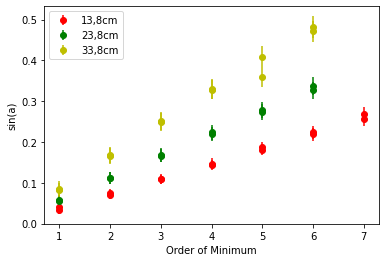

In [7]:
plt.errorbar(x, y1_v, yerr=y1_u, fmt='o', c='r', label='13,8cm')
plt.errorbar(x, y2_v, yerr=y2_u, fmt='o', c='g', label='23,8cm')
plt.errorbar(x, y3_v, yerr=y3_u, fmt='o', c='y', label='33,8cm')
plt.xlabel('Order of Minimum')
plt.ylabel('sin(a)')
plt.legend()
plt.savefig('Green_Minimum_vs_sin.png')

In [8]:
df2=df.copy()
df2['13,8cm'],df2['23,8 cm'],df2['33,8cm'] = y1_v,y2_v,y3_v
df2['13,8cm_u'],df2['23,8 cm_u'],df2['33,8cm_u'] = y1_u,y2_u,y3_u
x2,y2_v,y2_u=dropna_single_column(df2,'Ordnung','23,8 cm','23,8 cm_u')
x3,y3_v,y3_u=dropna_single_column(df2,'Ordnung','33,8cm','33,8cm_u')

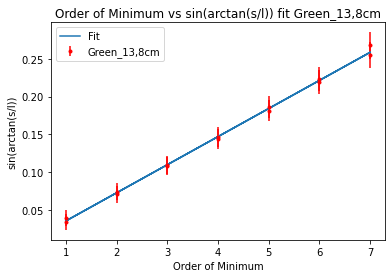

The slope = 0.03716554420134506, with uncertainty 0.00044473894395969136
The intercept = -0.001636311462312773, with uncertainty 0.001732535512602425


In [9]:
(slope1, d_slope1, inter1, d_inter1,x1,y1_fit) = data_fitting_error(linearFunc, x, y1_v, y1_u, 'Green_13,8cm', 
                            'Order of Minimum', 'sin(arctan(s/l))', 'Order of Minimum vs sin(arctan(s/l)) fit')
print(f'The slope = {slope1}, with uncertainty {d_slope1}')
print(f'The intercept = {inter1}, with uncertainty {d_inter1}')

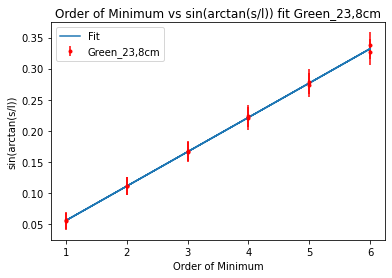

The slope = 0.05522032529658578, with uncertainty 0.00042833964807718054
The intercept = 0.0007481149625071848, with uncertainty 0.0014665722874811992


In [10]:
(slope2, d_slope2, inter2, d_inter2,x2,y2_fit) = data_fitting_error(linearFunc, x2, y2_v, y2_u, 'Green_23,8cm', 
                            'Order of Minimum', 'sin(arctan(s/l))', 'Order of Minimum vs sin(arctan(s/l)) fit')
print(f'The slope = {slope2}, with uncertainty {d_slope2}')
print(f'The intercept = {inter2}, with uncertainty {d_inter2}')

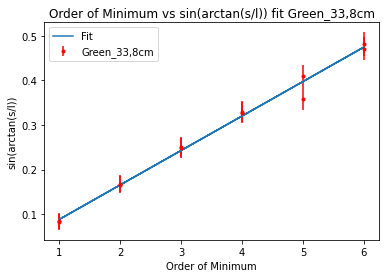

The slope = 0.0772855050216573, with uncertainty 0.0021833743706215327
The intercept = 0.01093255334196203, with uncertainty 0.007626029501621777


In [11]:
(slope3, d_slope3, inter3, d_inter3,x3,y3_fit) = data_fitting_error(linearFunc, x3, y3_v, y3_u, 'Green_33,8cm', 
                            'Order of Minimum', 'sin(arctan(s/l))', 'Order of Minimum vs sin(arctan(s/l)) fit')
print(f'The slope = {slope3}, with uncertainty {d_slope3}')
print(f'The intercept = {inter3}, with uncertainty {d_inter3}')

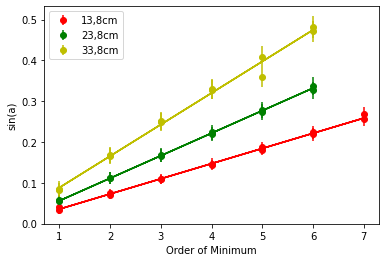

In [12]:
plt.errorbar(xc, y1_cv, yerr=y1_cu, fmt='o', c='r', label='13,8cm')
plt.errorbar(xc, y2_cv, yerr=y2_cu, fmt='o', c='g', label='23,8cm')
plt.errorbar(xc, y3_cv, yerr=y3_cu, fmt='o', c='y', label='33,8cm')
plt.plot(x,y1_fit,c='r')
plt.plot(x2,y2_fit,c='g')
plt.plot(x3,y3_fit,c='y')
plt.xlabel('Order of Minimum')
plt.ylabel('sin(a)')
plt.legend()
plt.savefig('Green_Minimum_vs_sin_fit.png')

In [13]:
slope_arr_compl = np.array([ufloat(slope1 , d_slope1) , ufloat(slope2 , d_slope2) , ufloat(slope3 , d_slope3)])

$$\lambda = m \cdot a $$
mit m slope und a gitterkonstante

In [14]:
a=ufloat(10,0.02) #in micrometer
lam=a*slope_arr_compl
lam_avg=np.mean(lam)*1000 #in nanometer

In [15]:
lam_avg

565.5712483986272+/-7.647472150253821

In [20]:
print(slope_arr_compl*1000)

[37.165544201345064+/-0.4447389439596914
 55.22032529658578+/-0.42833964807718056
 77.2855050216573+/-2.1833743706215327]


In [21]:
print(lam_avg/a)

56.6+/-0.8


In [17]:
intercept_arr_compl = np.array([ufloat(inter1 , d_inter1) , ufloat(inter2 , d_inter2) , ufloat(inter3 , d_inter3)])
intercept_arr_compl

array([-0.001636311462312773+/-0.001732535512602425,
       0.0007481149625071848+/-0.0014665722874811992,
       0.01093255334196203+/-0.007626029501621777], dtype=object)